# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
import csv as csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
city_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
counter = 0
randlat = []
randlngs = []
cities = []

# Create a set of random lat and lng combinations
while len(randlat)< 500:
    lats = np.random.uniform(low=-90, high=90)
    lngs = np.random.uniform(low=-180, high=180)
    randlat.append(lats)
    randlngs.append(lngs)            
    counter += 1
    
coord_df = pd.DataFrame({"lats":randlat, "lngs": randlngs})  
coord_df.head()
    



,lats,lngs
0,9.320222,10.917498
1,-31.546835,-125.424034
2,-12.909326,147.301104
3,-33.366549,96.470329
4,8.538054,-3.099112


In [5]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#print(cities)

611


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL to begin call
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + api_key

#Set up list for responses
date = []
country = []
lat = []
lon = []
temp_max = []
humidity = []
cloud = []
wind = []
_cities = []
print("Beginning Data Retrieval")

for city in cities:
    url_city = url + "&q=" + str(city)
    #print(url_city)
    #convert to json  
    try:
        city_data = requests.get(url_city).json()
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        lat.append(city_data['coord']['lat'])
        lon.append(city_data['coord']['lon'])
        temp_max.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity']) 
        cloud.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        _cities.append(city)
        print(f"retreiving data | {city}")
    except:
        print("If city is not found, skipping")
print("Retrieval is complete!")
data_dict = {'city': _cities,
                  'country': country,
                  'latitude': lat,
                  'longitude': lon,
                  'max temp': temp_max,
                  'humidity': humidity,
                  'cloudiness': cloud,
                  'windspeed': wind} 
                                               


Beginning Data Retrieval
If city is not found, skipping
retreiving data | eskilstuna
retreiving data | san juan
retreiving data | san andres
retreiving data | rikitea
retreiving data | albany
retreiving data | ossora
retreiving data | kiama
retreiving data | cidreira
retreiving data | port alfred
retreiving data | arraial do cabo
retreiving data | thompson
retreiving data | isangel
retreiving data | yellowknife
If city is not found, skipping
retreiving data | puerto ayora
retreiving data | la ronge
retreiving data | saint-pierre
retreiving data | ushuaia
retreiving data | atuona
retreiving data | lambare
retreiving data | imeni poliny osipenko
If city is not found, skipping
retreiving data | hobyo
retreiving data | xining
retreiving data | tuktoyaktuk
retreiving data | mar del plata
retreiving data | vermillion
retreiving data | longyearbyen
retreiving data | ahipara
retreiving data | port elizabeth
retreiving data | bethel
retreiving data | mataura
retreiving data | bredasdorp
retreiv

retreiving data | gat
retreiving data | saint anthony
retreiving data | gravdal
retreiving data | coihaique
retreiving data | shinpokh
retreiving data | petropavlovsk-kamchatskiy
retreiving data | mucuri
If city is not found, skipping
retreiving data | high level
retreiving data | bambanglipuro
retreiving data | wamba
retreiving data | jalu
retreiving data | kizlyar
retreiving data | margate
retreiving data | pangody
retreiving data | bandarbeyla
retreiving data | maniitsoq
retreiving data | farafangana
retreiving data | fairbanks
If city is not found, skipping
retreiving data | pisco
retreiving data | iglesias
retreiving data | vestmannaeyjar
If city is not found, skipping
retreiving data | quelimane
retreiving data | dunedin
retreiving data | kenai
retreiving data | fatwa
retreiving data | isilkul
retreiving data | chilca
retreiving data | taltal
retreiving data | airai
retreiving data | wanning
retreiving data | quatre cocos
retreiving data | hervey bay
retreiving data | auki
retrei

retreiving data | atambua
If city is not found, skipping
retreiving data | itzehoe
retreiving data | davila
retreiving data | medernach
retreiving data | windsor
retreiving data | marystown
retreiving data | manta
retreiving data | chicama
retreiving data | sangar
retreiving data | nuuk
retreiving data | waddan
retreiving data | san jose el idolo
retreiving data | newcastle
retreiving data | kollo
If city is not found, skipping
retreiving data | hirakud
retreiving data | ostersund
retreiving data | sarakhs
retreiving data | itarema
retreiving data | saquena
Retrieval is complete!


In [7]:
#print(data_dict)
df = pd.DataFrame.from_dict(data_dict)
df.head()

,city,country,latitude,longitude,max temp,humidity,cloudiness,windspeed
0,eskilstuna,SE,59.37,16.51,2.78,80,100,5.70
1,san juan,AR,-31.54,-68.53,32.32,17,29,3.18
2,san andres,PH,13.32,122.68,24.27,94,70,0.75
3,rikitea,PF,-23.12,-134.97,23.34,77,96,4.43
4,albany,US,42.65,-73.75,8.33,45,75,3.60


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
df.count()

city          552
country       552
latitude      552
longitude     552
max temp      552
humidity      552
cloudiness    552
windspeed     552
dtype: int64

In [9]:
#Convert file to csv and save
df.to_csv("weather_data.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

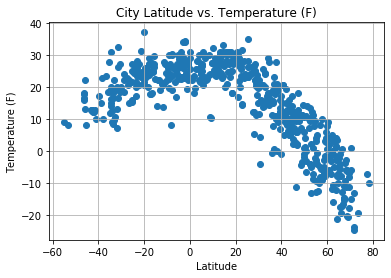

In [10]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["max temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature (F).png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

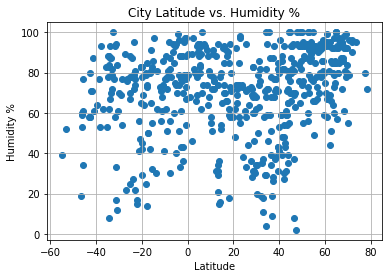

In [11]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity %")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity%.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

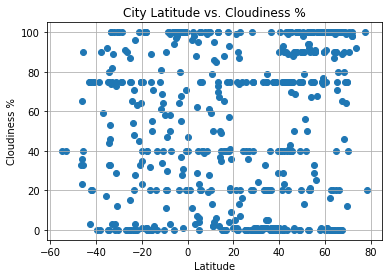

In [12]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness %")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Clouds%.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

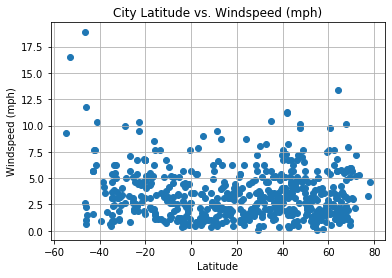

In [13]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (mph)")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Windspeed(mph).png")

# Show plot
plt.show()